In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# EDA

df_number :  (7043, 3)
df_object :  (7043, 18)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')
Unique values : 7043 -- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


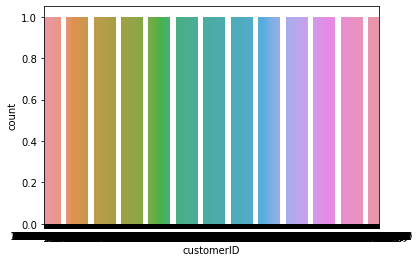

None


Unique values : 2 -- ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


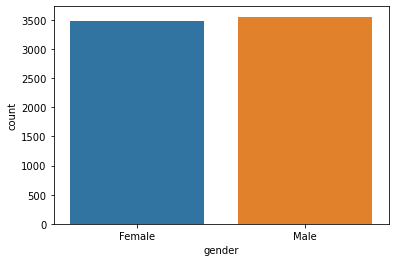

None


Unique values : 2 -- [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


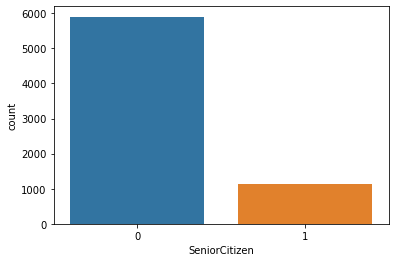

None


Unique values : 2 -- ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


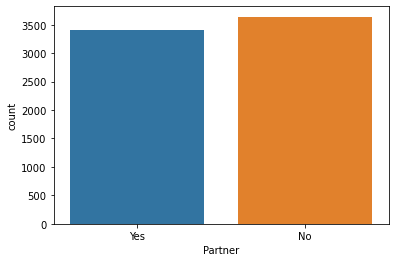

None


Unique values : 2 -- ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


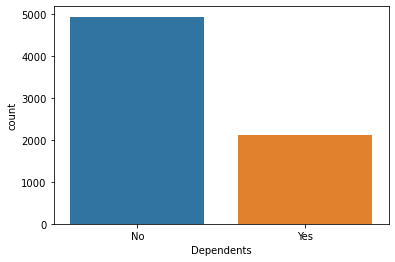

None


Unique values : 2 -- ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


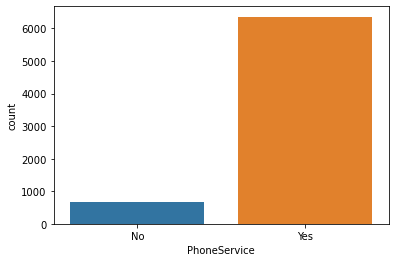

None


Unique values : 3 -- ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


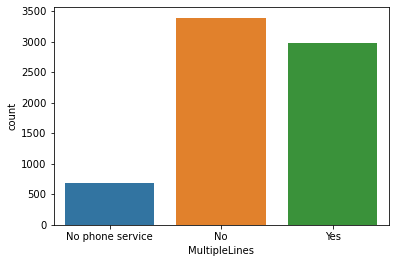

None


Unique values : 3 -- ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


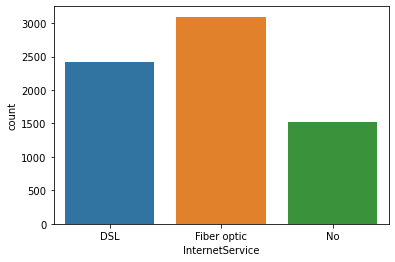

None


Unique values : 3 -- ['No' 'Yes' 'No internet service']
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


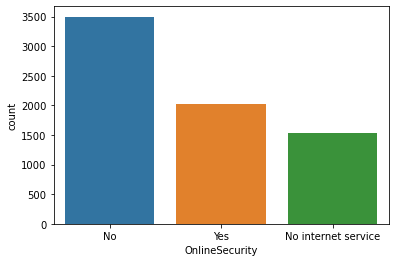

None


Unique values : 3 -- ['Yes' 'No' 'No internet service']
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


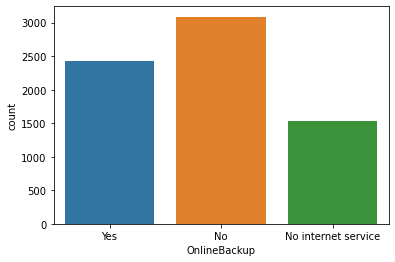

None


Unique values : 3 -- ['No' 'Yes' 'No internet service']
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


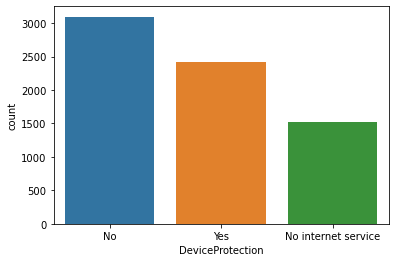

None


Unique values : 3 -- ['No' 'Yes' 'No internet service']
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


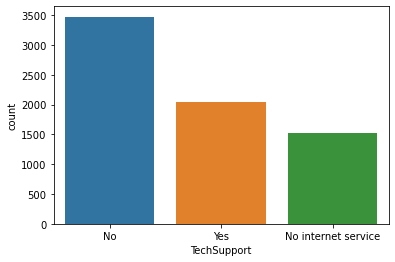

None


Unique values : 3 -- ['No' 'Yes' 'No internet service']
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


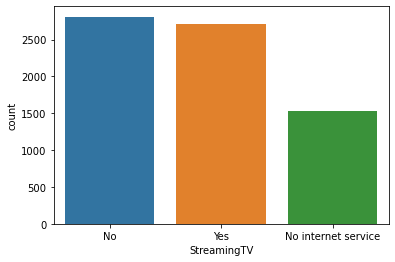

None


Unique values : 3 -- ['No' 'Yes' 'No internet service']
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


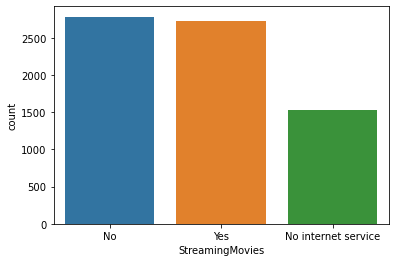

None


Unique values : 3 -- ['Month-to-month' 'One year' 'Two year']
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


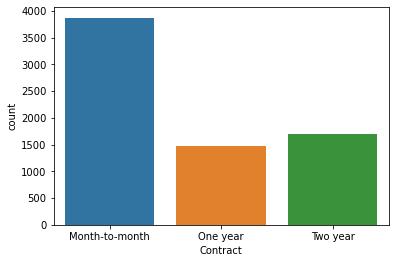

None


Unique values : 2 -- ['Yes' 'No']
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


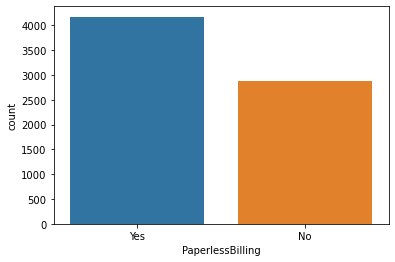

None


Unique values : 4 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


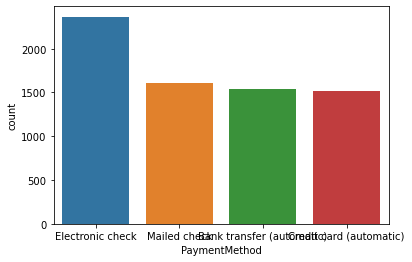

None


Unique values : 2 -- ['No' 'Yes']
No     5174
Yes    1869
Name: Churn, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


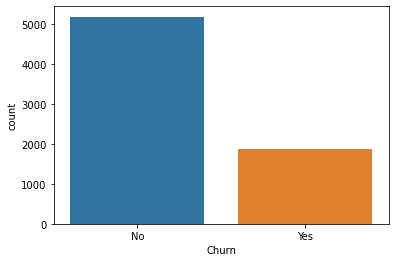

None




In [7]:
df1 = df.copy()
df1['TotalCharges'] = df1['TotalCharges'].replace(' ',np.nan)
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'])
df1['SeniorCitizen'] = df1['SeniorCitizen'].astype('object')
df_object = df1.select_dtypes(include=object)
df_number = df1.select_dtypes(include=['int64','float64'])
print('df_number : ',df_number.shape)
print('df_object : ',df_object.shape)
print(df_object.columns)
print('==================')
def get_value_counts(col):
    print('Unique values :', df_object[col].nunique() ,'--',df_object[col].unique())
    print(df_object[col].value_counts())
    
def bar_plot(col):
    print(sn.countplot(df_object[col]))   
    print(plt.show())
    
for col in df_object.columns:
    get_value_counts(col)
    bar_plot(col)
    print('\n')

### Prepare

In [8]:
#TotalCharges	count 7032.0
df2 = df1.copy()
df2['TotalCharges'] = df2['TotalCharges'].fillna(np.mean(df2['TotalCharges']))
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [9]:
df2_object = df2.select_dtypes(include=object)
df2_number = df2.select_dtypes(include=['int64','float64'])
df3 = pd.concat([df2_object,df2_number],axis=1)
df3['Churn_'] = df3['Churn']
df3 = df3.drop(columns=['Churn'])
df3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges,Churn_
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,1,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,34,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,2,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),45,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,2,70.70,151.65,Yes


# Preprocessing
- Encoding columns that contains two categories **['yes','no'] , ['male','female']** to **[1,0]** 
- Encoding columns that contains more than two categories using One Hot Encoding
- Scale the numerical values

In [10]:
df3.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
Churn_               object
dtype: object

In [11]:
df3.shape

(7043, 21)

In [12]:
df3_object = df3.select_dtypes(include=object)
df3_number = df3.select_dtypes(include=['int64','float64'])

In [13]:
df3 = df3.drop(columns=['customerID'])

### Encoding Categorical data
- 2 label
- more than 2 label

In [14]:
df4 = df3.copy()
df4_object = df4.select_dtypes(include=object)
df4_number = df4.select_dtypes(include=['int64','float64'])

print(df4['MultipleLines'].unique())
print(df4_object['MultipleLines'].value_counts(),'\n')

cols_binarylabel = [col for col in df4_object.columns if len(df4_object[col].unique())>2] #yes,no
for col in cols_binarylabel:
        df4_object.loc[df4_object[col].str.contains('No ') , col] = 'No'

print(df4['MultipleLines'].unique())
print(df4_object['MultipleLines'].value_counts())

['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

['No' 'Yes']
No     4072
Yes    2971
Name: MultipleLines, dtype: int64


In [15]:
df4.shape , df4_object.shape , df4_number.shape

((7043, 20), (7043, 17), (7043, 3))

Unique values : 2 -- ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


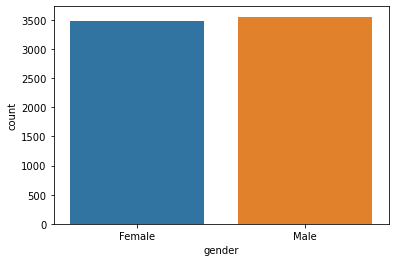

None


Unique values : 2 -- [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


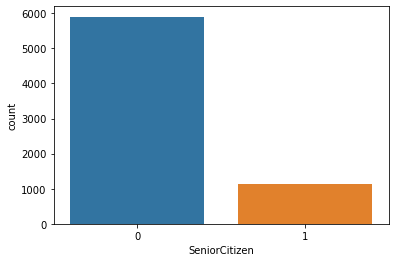

None


Unique values : 2 -- ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


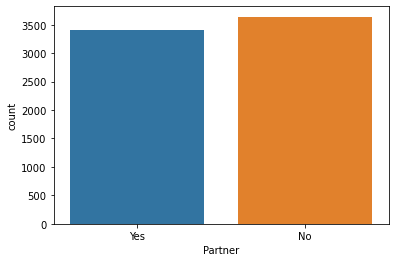

None


Unique values : 2 -- ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


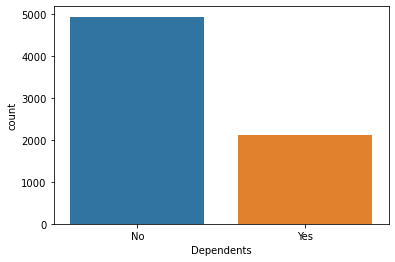

None


Unique values : 2 -- ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


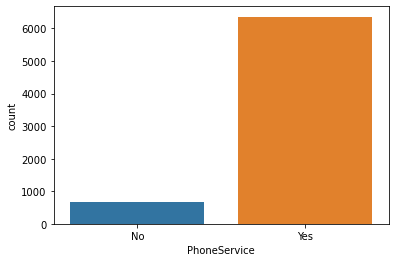

None


Unique values : 2 -- ['No' 'Yes']
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


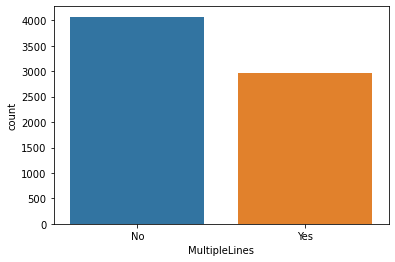

None


Unique values : 3 -- ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


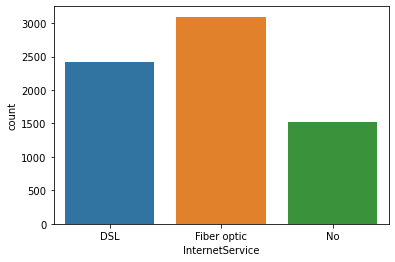

None


Unique values : 2 -- ['No' 'Yes']
No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


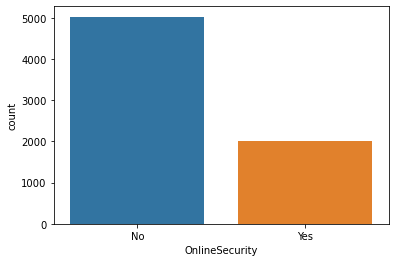

None


Unique values : 2 -- ['Yes' 'No']
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


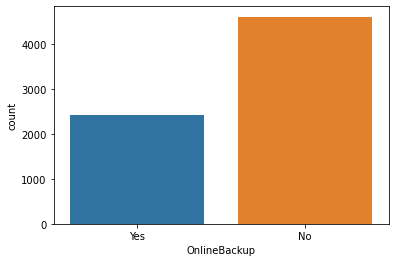

None


Unique values : 2 -- ['No' 'Yes']
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


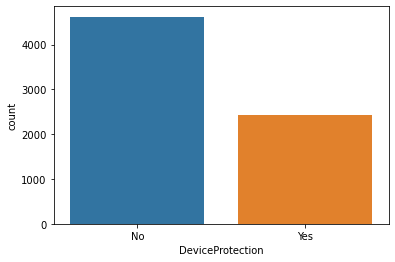

None


Unique values : 2 -- ['No' 'Yes']
No     4999
Yes    2044
Name: TechSupport, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


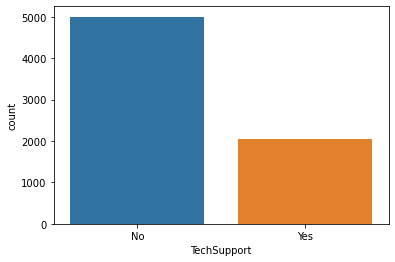

None


Unique values : 2 -- ['No' 'Yes']
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


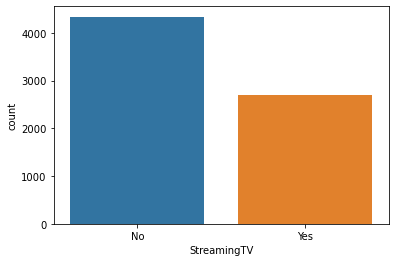

None


Unique values : 2 -- ['No' 'Yes']
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


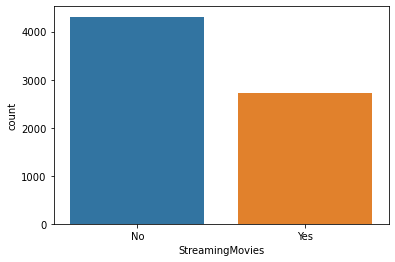

None


Unique values : 3 -- ['Month-to-month' 'One year' 'Two year']
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


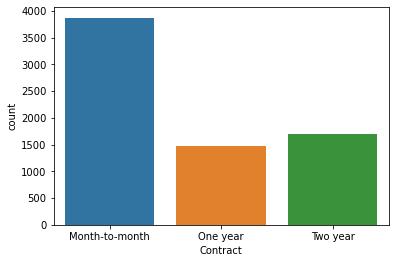

None


Unique values : 2 -- ['Yes' 'No']
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


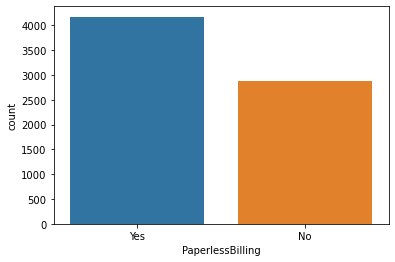

None


Unique values : 4 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


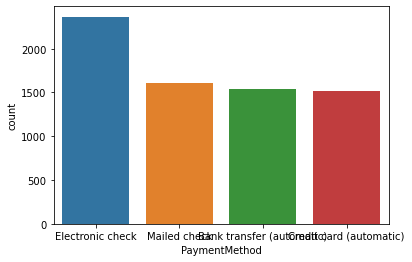

None


Unique values : 2 -- ['No' 'Yes']
No     5174
Yes    1869
Name: Churn_, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


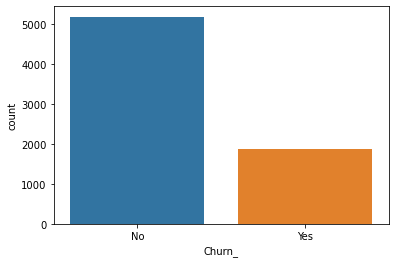

None




In [16]:
def get_value_counts(col,df):
    print('Unique values :', df[col].nunique() ,'--',df[col].unique())
    print(df[col].value_counts())
    
def bar_plot(col,df):
    print(sn.countplot(df[col]))   
    print(plt.show())
    
def display_(df):
    for col in df.columns:
        get_value_counts(col,df)
        bar_plot(col,df)
        print('\n')

display_(df4_object)

#### Replace to 1,0

Unique values : 2 -- [0 1]
1    3555
0    3488
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


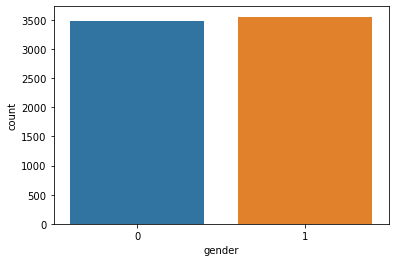

None


Unique values : 2 -- [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


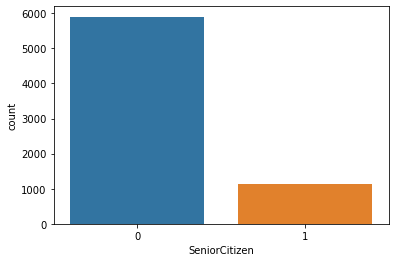

None


Unique values : 2 -- [1 0]
0    3641
1    3402
Name: Partner, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


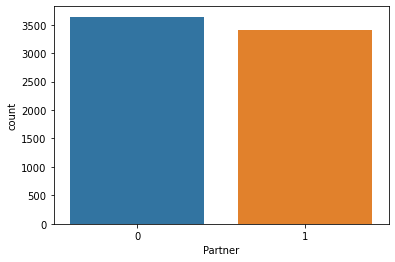

None


Unique values : 2 -- [0 1]
0    4933
1    2110
Name: Dependents, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


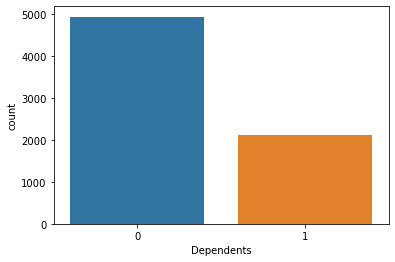

None


Unique values : 2 -- [0 1]
1    6361
0     682
Name: PhoneService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


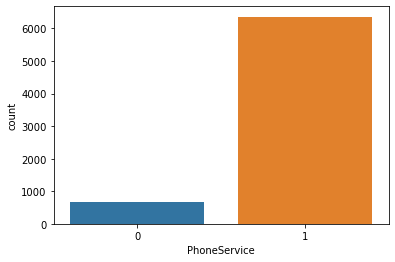

None


Unique values : 2 -- [0 1]
0    4072
1    2971
Name: MultipleLines, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


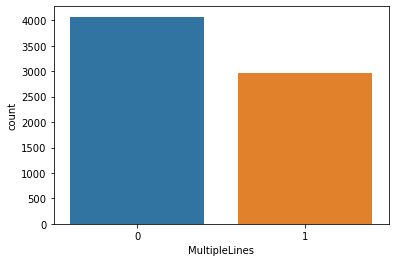

None


Unique values : 3 -- ['DSL' 'Fiber optic' 0]
Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


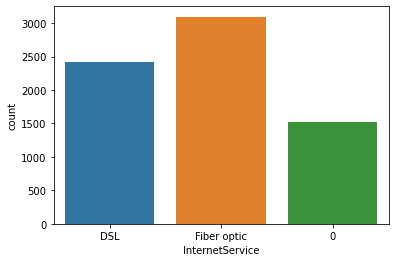

None


Unique values : 2 -- [0 1]
0    5024
1    2019
Name: OnlineSecurity, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


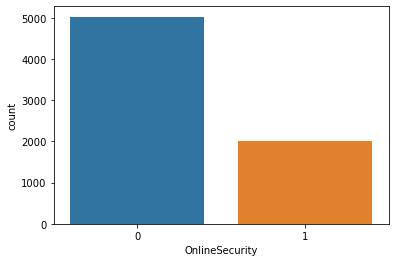

None


Unique values : 2 -- [1 0]
0    4614
1    2429
Name: OnlineBackup, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


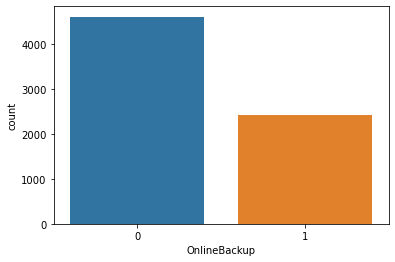

None


Unique values : 2 -- [0 1]
0    4621
1    2422
Name: DeviceProtection, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


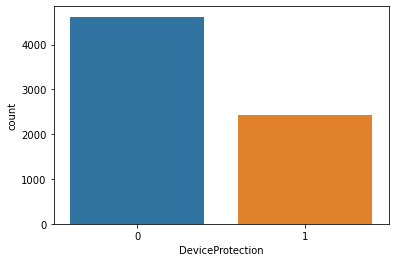

None


Unique values : 2 -- [0 1]
0    4999
1    2044
Name: TechSupport, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


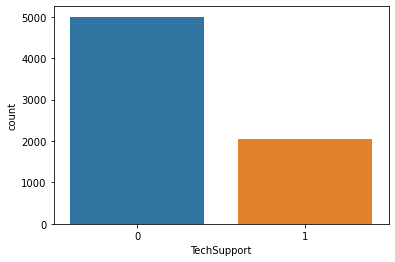

None


Unique values : 2 -- [0 1]
0    4336
1    2707
Name: StreamingTV, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


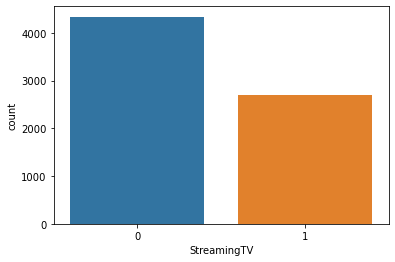

None


Unique values : 2 -- [0 1]
0    4311
1    2732
Name: StreamingMovies, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


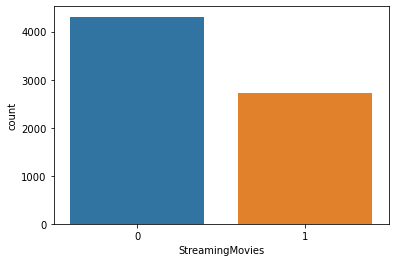

None


Unique values : 3 -- ['Month-to-month' 'One year' 'Two year']
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


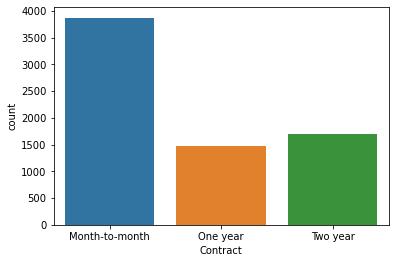

None


Unique values : 2 -- [1 0]
1    4171
0    2872
Name: PaperlessBilling, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


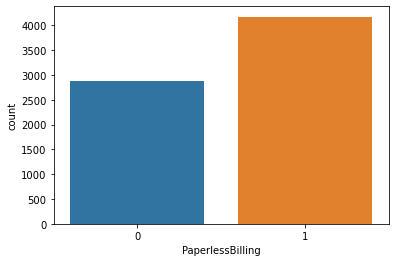

None


Unique values : 4 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


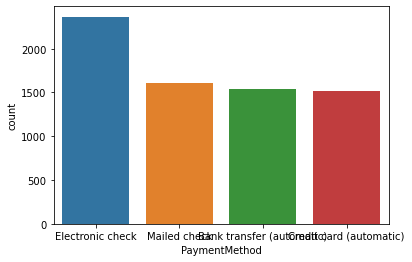

None


Unique values : 2 -- [0 1]
0    5174
1    1869
Name: Churn_, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


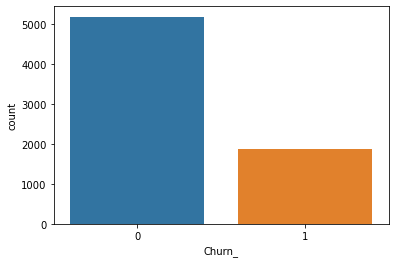

None




In [17]:
df4_object.replace(['Yes','No'],[1,0],inplace=True)
df4_object.replace(['Male','Female'],[1,0],inplace=True)
df4_object_categ = df4_object
display_(df4_object_categ)

In [18]:
print(df4_object_categ.shape)
df4_object_categ.head()

(7043, 17)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn_
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1


#### Encoding multilabels (>2 categories) using OHE

In [19]:
# df4_object.describe().T[df4_object.describe().T['unique']>2]
df4_object[cols_multilabel].describe().T

NameError: name 'cols_multilabel' is not defined

Unique values : 3 -- ['DSL' 'Fiber optic' 0]
Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


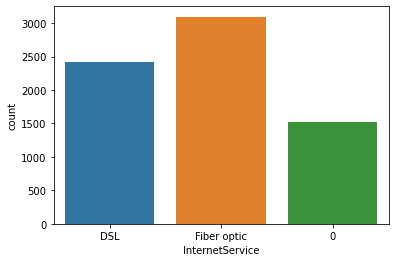

None


Unique values : 3 -- ['Month-to-month' 'One year' 'Two year']
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


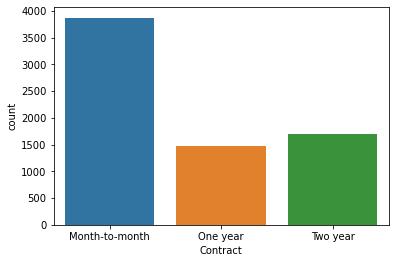

None


Unique values : 4 -- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


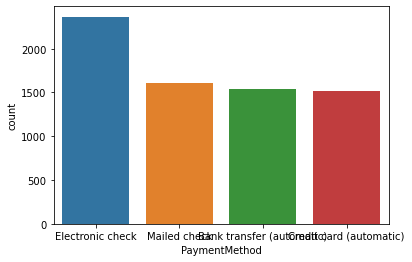

None




In [20]:
cols_multilabel = ['InternetService' , 'Contract' , 'PaymentMethod']
df4_object_categs = df4_object[cols_multilabel]
df4_object_categs
display_(df4_object_categs)

In [21]:
df4_object.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn_
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1
3,1,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),0
4,0,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,1


In [22]:
df4_object.shape

(7043, 17)

In [23]:
df5_object = pd.get_dummies(data=df4_object)
df5_object

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,1,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [24]:
df4.shape , df4_number.shape , df4_object.shape #df4_object.shape[1]+dummies (+2+2+3)

((7043, 20), (7043, 3), (7043, 17))

### Scale Numerical data

In [25]:
df4_number.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


#### Checking outliers

AxesSubplot(0.125,0.125;0.775x0.755)


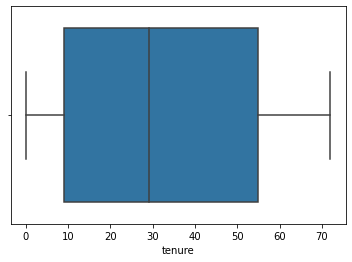

None
AxesSubplot(0.125,0.125;0.775x0.755)


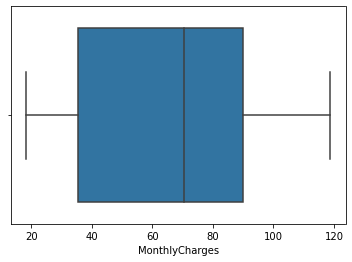

None
AxesSubplot(0.125,0.125;0.775x0.755)


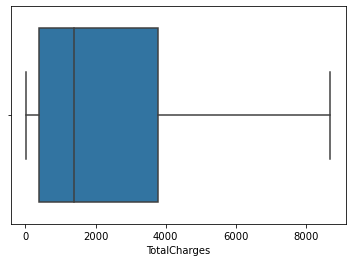

None


In [26]:
def box_plot(df):
    for col in df.columns:
        print(sn.boxplot(df[col]))
        print(plt.show())
box_plot(df4_number)
#there is no outliers

#### Distribution

AxesSubplot(0.125,0.125;0.775x0.755)


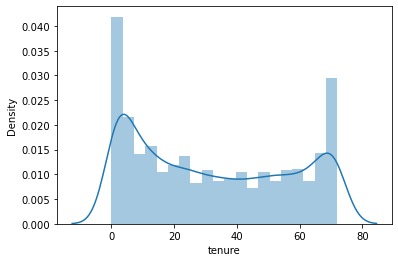

None
AxesSubplot(0.125,0.125;0.775x0.755)


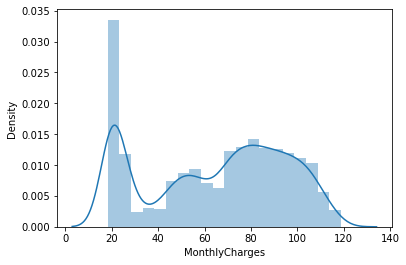

None
AxesSubplot(0.125,0.125;0.775x0.755)


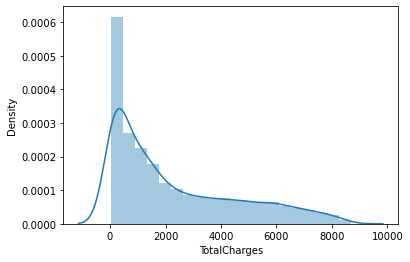

None


In [27]:
def dist(df):
    for col in df.columns:
        print(sn.distplot(df[col],bins=20))
        print(plt.show())        
dist(df4_number)
#data is not normally distributed ,so in this case we will use MinMaxScaler (Normalization)

#### Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4_number_scaled = scaler.fit_transform(df4_number)
df5_number = pd.DataFrame(df4_number_scaled,columns=df4_number.columns)
df5_number

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


In [29]:
df5_number.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,0.449599,0.341104,0.0,0.125000,0.402778,0.763889,1.0
MonthlyCharges,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0
TotalCharges,7043.0,0.261309,0.261366,0.0,0.044245,0.159445,0.434780,1.0


### Final Dataset

In [30]:
df5_object.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [31]:
df5_number.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [32]:
df5_object.shape , df5_number.shape

((7043, 24), (7043, 3))

In [33]:
df5 = pd.concat([df5_object,df5_number],axis=1)
df5.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'Churn_', 'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [34]:
if 'Churn_' in df5.columns:
    df5['_Churn_'] = df5['Churn_']
    df5 = df5.drop(columns='Churn_')
df5

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,_Churn_
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0.013889,0.115423,0.001275,0
1,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0.472222,0.385075,0.215867,0
2,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0.027778,0.354229,0.010310,1
3,1,0,0,0,0,0,1,0,1,1,...,1,0,1,0,0,0,0.625000,0.239303,0.210241,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.027778,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,1,0,1,1,...,1,0,0,0,0,1,0.333333,0.662189,0.227521,0
7039,0,0,1,1,1,1,0,1,1,0,...,1,0,0,1,0,0,1.000000,0.845274,0.847461,0
7040,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0.152778,0.112935,0.037809,0
7041,1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0.055556,0.558706,0.033210,1


In [42]:
df5.to_csv('customer_churn_clean.csv')

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

x = df5.drop('_Churn_',axis=1)
y = df5['_Churn_']

x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
x_train.shape , y_train.shape  

((5634, 26), (5634,))

In [37]:
x_test.shape , y_test.shape

((1409, 26), (1409,))

## Model

In [38]:
model = keras.Sequential([
    keras.layers.Dense(20 , input_shape=(x_train.shape[1],) , activation='relu'),
    #keras.layers.Dense(15 , activation='relu'),
    keras.layers.Dense(1 , activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy']) #cuz we have binary output
model.fit(x_train , y_train , epochs=100)

Epoch 1/100
177/177 [==============================] - 4s 3ms/step - loss: 0.5280 - accuracy: 0.7348
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7930
Epoch 3/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4257 - accuracy: 0.7987
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8062
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8062
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8065
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8069
Epoch 8/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8060
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8085
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4132 - accura

177/177 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8161
Epoch 82/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8170
Epoch 83/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8172
Epoch 84/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8145
Epoch 85/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8175
Epoch 86/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8177
Epoch 87/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8165
Epoch 88/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8168
Epoch 89/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8186
Epoch 90/100
177/177 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 

In [39]:
model.evaluate(x_test,y_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.4443 - accuracy: 0.7899


[0.4443316161632538, 0.7899219393730164]

In [40]:
y_pred = model.predict(x_test)
y_pred_enscaled = []
for y in y_pred:
    if y > 0.5:
        y_pred_enscaled.append(1)
    else:
        y_pred_enscaled.append(0)
y_pred_enscaled[:5]

45/45 [==============================] - 0s 1ms/step


[0, 0, 0, 1, 0]

In [43]:
y_test[:5]

4213    1
5035    0
3713    1
1720    0
234     0
Name: _Churn_, dtype: int64

### Reports

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,y_pred_enscaled))
# imbalanced dataset problem

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1023
           1       0.64      0.53      0.58       386

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



[[907 116]
 [180 206]]


Text(33.0, 0.5, 'Truth')

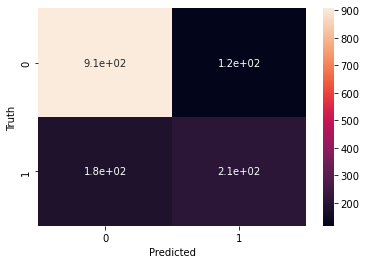

In [46]:
print(confusion_matrix(y_test , y_pred_enscaled))
sn.heatmap(confusion_matrix(y_test , y_pred_enscaled) , annot=True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
tf.math.confusion_matrix(labels=y_test , predictions=y_pred_enscaled)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[907, 116],
       [180, 206]])>

## Handling Imbalanced dataset problem

### Model1 : under sampling

### Model2 : over sampling (blind copy/SMOTE)

### Model3 : ensemble method


### Model4 : focal loss